In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import imblearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from matplotlib import pyplot

# Data Preprocessing

In [2]:
#read the data
raw = pd.read_csv('cgfinal414.csv')

In [3]:
raw = raw.drop(columns='id')

In [4]:
raw['cggad7'].value_counts()

0.0    300
1.0     97
Name: cggad7, dtype: int64

In [5]:
raw1 = raw.dropna()

In [6]:
df_cgd=raw1

In [7]:

one_hot = pd.get_dummies(raw1['StudyArm'])
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('StudyArm',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

one_hot = pd.get_dummies(df_cgd['incomecat'],prefix='incomecat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('incomecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)
df_cgd = df_cgd.drop('incomecat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['gradecat'],prefix='gradecat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('gradecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('gradecat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['relationship_cat'],prefix='relationship_cat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('relationship_cat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('relationship_cat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['racecat'],prefix='race_cat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('racecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('race_cat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['TTC3'],prefix='TTC3')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('TTC3',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('TTC3_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['GI_Lung'],prefix='GI_Lung')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('GI_Lung',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('GI_Lung_3.0',axis = 1)

In [8]:
raw1=df_cgd

In [9]:
raw1.columns.values

array(['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom', 'cgdistress',
       'cggad7', 'cgphq2', 'SF12total', 'AGG_PHYS', 'AGG_MENT', 'Control',
       'GA', 'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0'], dtype=object)

In [10]:
raw1['cggad7'].describe()

count    380.000000
mean       0.242105
std        0.428922
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: cggad7, dtype: float64

In [11]:
raw1['cggad7'].value_counts()

0.0    288
1.0     92
Name: cggad7, dtype: int64

In [ ]:
#Select features and train test split

In [12]:
X = raw1[['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom',  'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0']]
y = raw1['cggad7']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [15]:
X_train.shape
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_test).items()))

[(0.0, 216), (1.0, 69)]
[(0.0, 72), (1.0, 23)]


In [16]:
X_train.shape
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_test).items()))

[(0.0, 216), (1.0, 69)]
[(0.0, 72), (1.0, 23)]


In [17]:
X_test.shape

(95, 31)

In [18]:
y_test.shape

(95,)

In [19]:
X_test

,Age,Gender,Living,TTC5,TTC6a,TTC6b,TTC6c,TTC6d,distress,ImpairedPolypharmacy,...,gradecat_1.0,gradecat_2.0,relationship_cat_1.0,relationship_cat_2.0,race_cat_1.0,race_cat_2.0,TTC3_1.0,TTC3_2.0,GI_Lung_1.0,GI_Lung_2.0
403,72.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0,...,0,1,1,0,1,0,0,1,0,1
39,78.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1,...,0,1,1,0,1,0,0,1,0,0
35,80.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,1,0,1,0,0,1,1,0
354,72.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,1,0,1,0,1,0,0,1,0,1
320,69.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,78.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,1,0,1,0,0,1,0,1
75,75.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,...,0,0,1,0,1,0,0,1,0,0
366,86.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,1,0
290,73.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1,...,0,0,1,0,1,0,0,1,0,0


Text(0.5, 1.0, 'Class Distributions \n (0: Negative || 1: Positive)')

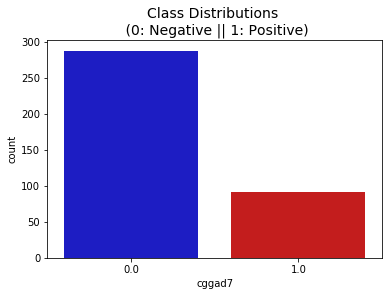

In [20]:
#class distributions
import seaborn as sns
colors = ["#0101DF","#DF0101"]

sns.countplot('cggad7', data=raw1, palette=colors)
plt.title('Class Distributions \n (0: Negative || 1: Positive)', fontsize=14)

In [21]:
y.shape

(380,)

In [22]:
print(sorted(Counter(y).items()))

[(0.0, 288), (1.0, 92)]


In [23]:
raw2=X
raw2['cggad7']=y

d:\anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Smoting the data & PCA

In [24]:
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from collections import Counter

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

from imblearn.over_sampling import KMeansSMOTE
over = SVMSMOTE(random_state=0)

T-SNE took 1.7 s
PCA took 0.56 s
Truncated SVD took 0.08 s


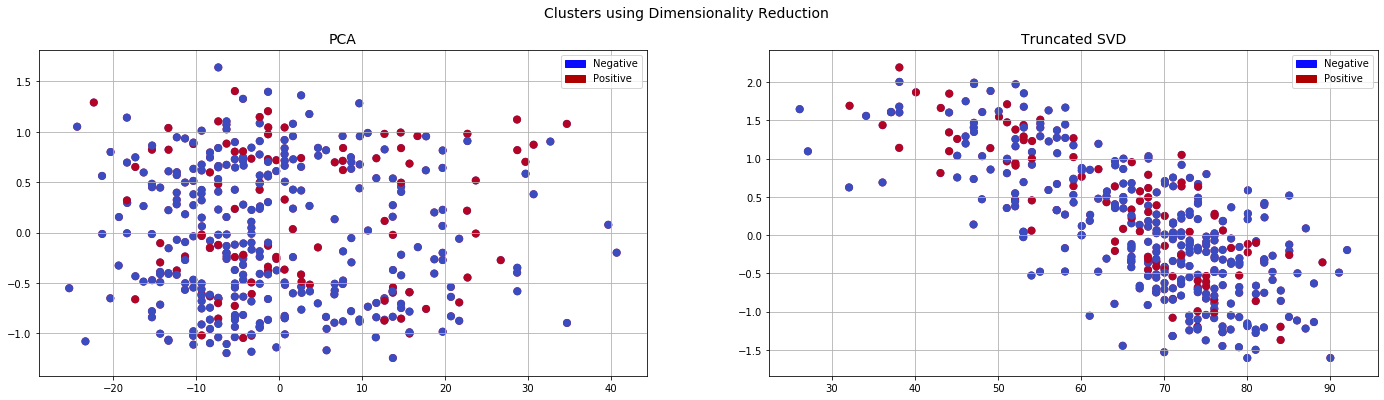

In [26]:
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# New_df is from the random undersample data (fewer instances)
X = raw2.drop('cggad7', axis=1)
y = raw2['cggad7']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

import matplotlib.patches as mpatches
f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Negative')
red_patch = mpatches.Patch(color='#AF0000', label='Positive')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Neg', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Pos', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Neg', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Pos', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [27]:
X_train1,y_train1 = over.fit_sample(X,y)
X_train1,y_train1 = over.fit_resample(X, y)
print(sorted(Counter(y_train1).items()))

[(0.0, 288), (1.0, 288)]


In [28]:

from imblearn.combine import SMOTETomek
# smote_tomek = SMOTETomek(random_state=0)

X_train3,y_train3= smote_tomek.fit_resample(X,y)

print(sorted(Counter(y_train3).items()))

In [29]:
X.shape

(380, 31)

In [30]:
new_df=X_train1
new_df['cggad7']=y_train1


In [31]:
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('cggad7', axis=1)
y = new_df['cggad7']
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.4 s
PCA took 0.004 s
Truncated SVD took 0.004 s


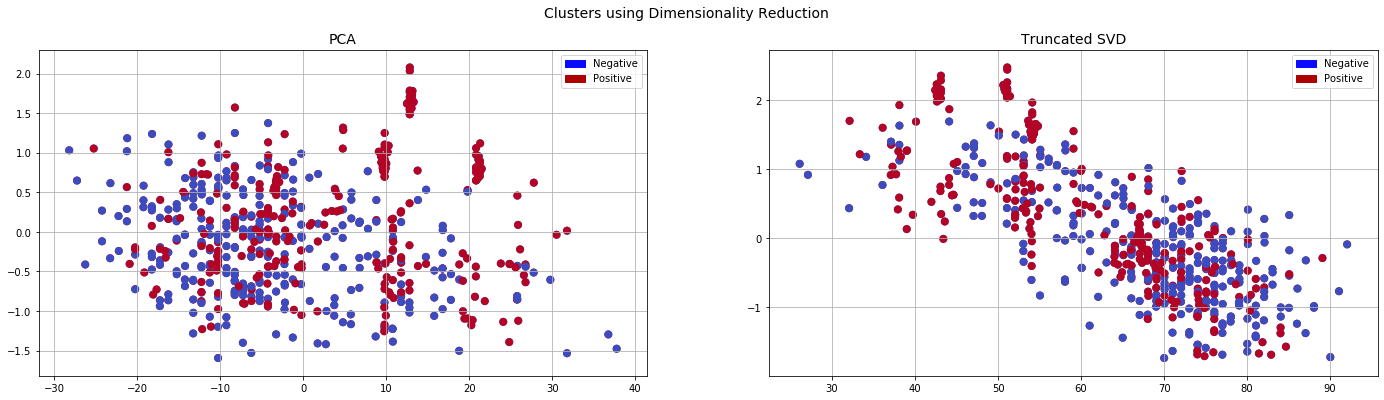

In [32]:

import matplotlib.patches as mpatches
f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Negative')
red_patch = mpatches.Patch(color='#AF0000', label='Positive')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Negative', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Positive', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Negative', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Positive', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [33]:
# from numpy import mean
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier

# # define model
# model1 = DecisionTreeClassifier()
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))
X = raw1[['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom',  'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0']]
y = raw1['cggad7']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)#####42

# Logistic Regression

In [34]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.linear_model import LogisticRegression
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('lgr',  LogisticRegression(random_state=42))
    ])

param_grid = {

}
# Create a based model

# Instantiate the grid search model
grid_searchlgr = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='accuracy',return_train_score=True,  
                          cv = 5, n_jobs = -1)

In [35]:
grid_searchlgr.fit(X_train, y_train)
grid_searchlgr.best_params_

d:\anaconda\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{}

In [54]:

# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
lgrres = grid_searchlgr.predict(X_test)
CMlgr = confusion_matrix(y_test, lgrres)
print(CMlgr)

[[66  6]
 [19  4]]


In [110]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
#functions to select the best decision threshold
def get_best_threshold(testy,yhat):
    fpr, tpr, thresholds = roc_curve(testy, yhat)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    return best_thresh



rfrr= grid_searchlgr.predict_proba(X_test)
rfrr_thres=get_best_threshold(y_test,rfrr[:,1])
rfrr=(rfrr[:,1]>=0.257).astype(int)
rfrr_cm = confusion_matrix(y_test,rfrr)
print(rfrr_cm)

Best Threshold=0.206784
[[45 27]
 [11 12]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.613


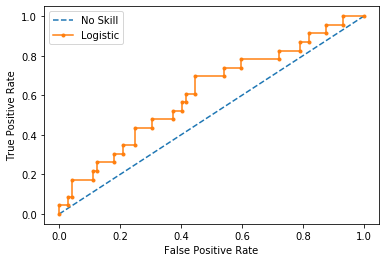

In [55]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

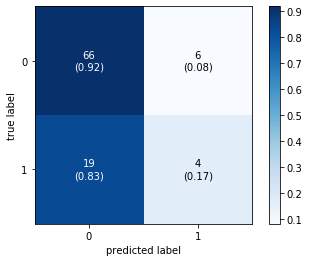

In [39]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[66 ,6],
 [ 19, 4]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Balanced RF

# BRF

In [133]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import  BalancedRandomForestClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrfx = Pipeline([
        ('brf', BalancedRandomForestClassifier(random_state=42,class_weight = {0:1,1:2.5},n_jobs=-1))
    ])

param_gridx = {
        'brf__max_features': [0.03,0.07,0.13, 0.15, 0.25,0.5,0.75,0.8,0.9,1],
        'brf__n_estimators': [10,25,45, 60,80, 110, 148, 200,400],
        'brf__min_samples_split': [2, 3, 5, 8,10, 12],
        'brf__min_samples_leaf': [1, 2, 4,8,10,12,15,20,40],
        'brf__max_depth': [5,10, 20,40, 60, None ],
        'brf__sampling_strategy': ['auto']
    

}

# Create a based model

# Instantiate the grid search model
grid_searchrfx = GridSearchCV(estimator = modelrfx, param_grid = param_gridx,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)
grid_searchrfx.fit(X_train, y_train)
grid_searchrfx.best_params_

Fitting 5 folds for each of 29160 candidates, totalling 145800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3018 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | e

{'brf__max_depth': 20,
 'brf__max_features': 0.75,
 'brf__min_samples_leaf': 1,
 'brf__min_samples_split': 2,
 'brf__n_estimators': 148,
 'brf__sampling_strategy': 'auto'}

In [134]:
print(grid_searchrfx.best_score_)
from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchrfx.predict(X_test)


CM = confusion_matrix(y_test, rfsmotey)
print(CM)

0.4308762231683124
[[48 24]
 [16  7]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.613
RF: ROC AUC=0.480


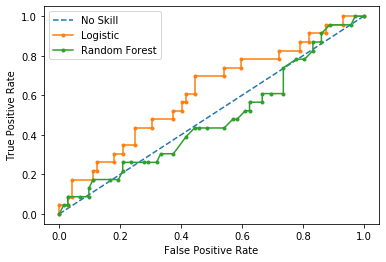

In [135]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrf = grid_searchrfx.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrf = lr_probsrf[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, lr_probsrf)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RF: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print(grid_searchrfx.best_score_)
from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchrfx.predict(X_test)


CM = confusion_matrix(y_test, rfsmotey)
print(CM)


In [ ]:
grid_searchrfx.score(X_test,y_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.613
RF: ROC AUC=0.480


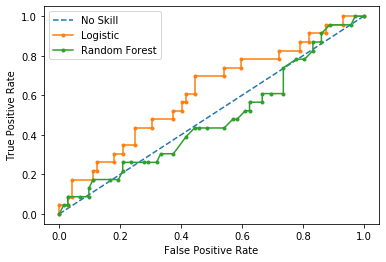

In [136]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrf = grid_searchrfx.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrf = lr_probsrf[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, lr_probsrf)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RF: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Creating Param Space for RUS Adaboost

In [49]:
n_est = []
for i in range(25,101):
    n_est.append(i)

n_est.append(200)
n_est.append(400)
    
print(n_est)
lr = []
for j in np.arange(0, 1.1, 0.1):
    lr.append(j)
    
lr.append(0.01)
lr.append(0.03)
lr.append(0.05)
lr.append(0.07)    
print(lr)


[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 200, 400]
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.01, 0.03, 0.05, 0.07]


# RUSBoost (Adaboost variant) Classifier

In [50]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)#####42
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modeleb = Pipeline([
        ('rus', RUSBoostClassifier(random_state=42))
    ])

param_gridx = {
        
        'rus__n_estimators': n_est,
        
       
        'rus__sampling_strategy': ['auto'],
        'rus__learning_rate': [0.01, 0.03, 0.05, 0.07, 0.001, 0.003, 0.005, 0.007, 0.1, 0.3, 0.5, 0.7],
        'rus__replacement': [False,True]
#         'rus__n_estimators': [10,25,45, 60,80, 110, 148, 200,400],
        
               
#         'rus__sampling_strategy': ['auto'],
#         'rus__learning_rate': [0.1,0.3,0.5,0.7,0.01,0.03,0.05,0.07,0.001,0.003,0.005,0.007,1],
#         'rus__replacement': [False,True]
        

}

# Create a based model

# Instantiate the grid search model
grid_searchrus = GridSearchCV(estimator = modeleb, param_grid = param_gridx,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)
grid_searchrus.fit(X_train1, y_train1)
grid_searchrus.best_params_

Fitting 5 folds for each of 1872 candidates, totalling 9360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 199 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 451 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 775 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1171 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 1639 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 2179 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 2791 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 3475 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4231 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 5059 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5959 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6931 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 7975 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 9091 tasks      |

{'rus__learning_rate': 0.05,
 'rus__n_estimators': 31,
 'rus__replacement': True,
 'rus__sampling_strategy': 'auto'}

In [52]:
print(grid_searchrus.best_score_)
from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchrus.predict(X_test1)


CM = confusion_matrix(y_test1, rfsmotey)
print(CM)

0.49046399783241884
[[47 25]
 [12 11]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.613
rus: ROC AUC=0.533


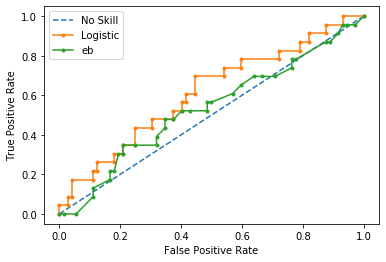

In [111]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test1))]
lr_probs = grid_searchlgr.predict_proba(X_test1)
lr_probseb = grid_searchrus.predict_proba(X_test1)


# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probseb = lr_probseb[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test1, ns_probs)
lr_auc = roc_auc_score(y_test1, lr_probs)
eb_auc = roc_auc_score(y_test1, lr_probseb)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('rus: ROC AUC=%.3f' % (eb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test1, lr_probs)

eb_fpr, eb_tpr, _ = roc_curve(y_test1, lr_probseb)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(eb_fpr, eb_tpr, marker='.', label='eb')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Another run of further tuning

In [112]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state=22,stratify=y)#####42
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modeleb = Pipeline([
        ('rus', RUSBoostClassifier(random_state=42))
    ])

param_gridx = {
        
#         'rus__n_estimators': n_est,
        
       
#         'rus__sampling_strategy': ['auto'],
#         'rus__learning_rate': [0.01, 0.03, 0.05, 0.07, 0.001, 0.003, 0.005, 0.007, 0.1, 0.3, 0.5, 0.7],
#         'rus__replacement': [False,True]
        'rus__n_estimators': [10,25,45, 60,80, 110, 148, 200,400],
        
               
        'rus__sampling_strategy': ['auto'],
        'rus__learning_rate': [0.1,0.3,0.5,0.7,0.01,0.03,0.05,0.07,0.001,0.003,0.005,0.007,1],
        'rus__replacement': [False,True]
        

}

# Create a based model

# Instantiate the grid search model
grid_searchrus = GridSearchCV(estimator = modeleb, param_grid = param_gridx,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)
grid_searchrus.fit(X_train1, y_train1)
grid_searchrus.best_params_

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 1170 out of 1170 | elapsed:   36.8s finished


{'rus__learning_rate': 0.07,
 'rus__n_estimators': 45,
 'rus__replacement': True,
 'rus__sampling_strategy': 'auto'}

In [114]:
print(grid_searchrus.best_score_)
from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchrus.predict(X_test1)


CM = confusion_matrix(y_test1, rfsmotey)
print(CM)

0.46072709898796854
[[35 23]
 [ 8 10]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.617
eb: ROC AUC=0.591


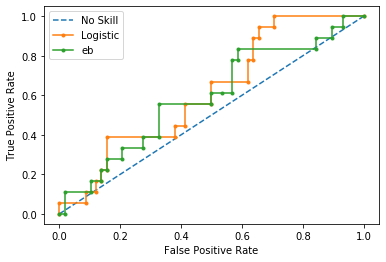

In [115]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test1))]
lr_probs = grid_searchlgr.predict_proba(X_test1)
lr_probseb = grid_searchrus.predict_proba(X_test1)


# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probseb = lr_probseb[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test1, ns_probs)
lr_auc = roc_auc_score(y_test1, lr_probs)
eb_auc = roc_auc_score(y_test1, lr_probseb)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('eb: ROC AUC=%.3f' % (eb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test1, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test1, lr_probs)

eb_fpr, eb_tpr, _ = roc_curve(y_test1, lr_probseb)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(eb_fpr, eb_tpr, marker='.', label='eb')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Final Round of Tuning for RUS(AdaBoost)

In [ ]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modeleb = Pipeline([
        ('rus', RUSBoostClassifier(random_state=42))
    ])

param_gridx = {
        
        'rus__n_estimators': [10,25,45, 60,80, 110, 148, 200,400],
        
               
        'rus__sampling_strategy': ['auto'],
        'rus__learning_rate': [0.1,0.3,0.5,0.7,0.01,0.03,0.05,0.07,0.001,0.003,0.005,0.007,1],
        'rus__replacement': [False,True]
         

}

# Create a based model

# Instantiate the grid search model
grid_searchrus1 = GridSearchCV(estimator = modeleb, param_grid = param_gridx,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)
grid_searchrus1.fit(X_train, y_train)
grid_searchrus1.best_params_

In [ ]:
#  'rus__n_estimators': [10,25,45, 60,80, 110, 148, 200,400],
        
       
#         'rus__sampling_strategy': ['auto','all','not majority','majority'],
#         'rus__learning_rate': [0.1,0.3,0.5,0.7,0.01,0.03,0.05,0.07,0.001,0.003,0.005,0.007,1],
#         'rus__replacement': [False,True]
        




print(grid_searchrfx.best_score_)
from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchrus1.predict(X_test)


CM = confusion_matrix(y_test, rfsmotey)
print(CM)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probseb = grid_searchrus1.predict_proba(X_test)


# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probseb = lr_probseb[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
eb_auc = roc_auc_score(y_test, lr_probseb)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('eb: ROC AUC=%.3f' % (eb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

eb_fpr, eb_tpr, _ = roc_curve(y_test, lr_probseb)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(eb_fpr, eb_tpr, marker='.', label='eb')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrf = grid_searchrfx.predict_proba(X_test)
lr_probsrus = grid_searchrus1.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrf = lr_probsrf[:, 1]
lr_probsrus = lr_probsrus[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, lr_probsrf)
rus_auc = roc_auc_score(y_test, lr_probsrus)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RF: ROC AUC=%.3f' % (rf_auc))
print('RUS: ROC AUC=%.3f' % (rus_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
rus_fpr, rus_tpr, _ = roc_curve(y_test, lr_probsrus)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(rus_fpr, rus_tpr, marker='.', label='RUS')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM

# Creating Param Space for SVM

In [120]:
C = []
for i in range(25,101):
    C.append(i)

    


c = []
for j in np.arange(0.1, 1.1, 0.1):
    c.append(j)

for k in np.arange(0.01, 0.1, 0.01):
    c.append(k)   
    

for i in np.arange(0.001, 0.01, 0.001):
    c.append(i)

    
print(c)

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001]


In [121]:
c=[]
for i in range(-12,12):
    c.append(2**i)
gamma=[]
for j in range(-12,12):
    gamma.append(2
                 **j)
print(c)

[0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)#####42
from sklearn.svm import SVC
modelsvmf1 = Pipeline([
        ('svm',  SVC(random_state=42,probability=True,class_weight = {0:1,1:3.9}))
    ])
# (309/71)

# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV



param_gridsvmf1 = {'svm__C': c, 

              'svm__gamma': gamma}  
  


svmgridsearchf1 = GridSearchCV(estimator=modelsvmf1, param_grid=param_gridsvmf1, n_jobs=-1, 
                             cv=5, verbose=5, return_train_score=True,scoring="f1")


svmgridsearchf1.fit(X_train, y_train)
svmgridsearchf1.best_score_
svmgridsearchf1.best_params_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1164 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 2424 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:    9.4s finished


{'svm__C': 64, 'svm__gamma': 0.0009765625}

In [163]:
svmgridsearchf1.best_score_

0.42457012917339665

In [164]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
rfsmotey = svmgridsearchf1.predict(X_test)
CM = confusion_matrix(y_test, rfsmotey)
print(CM)

[[42 30]
 [ 9 14]]


In [181]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve

def get_best_threshold(testy,yhat):
    fpr, tpr, thresholds = roc_curve(testy, yhat)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    return best_thresh



rfrr= svmgridsearchf1.predict_proba(X_test)
rfrr_thres=get_best_threshold(y_test,rfrr[:,1])
rfrr=(rfrr[:,1]>=0.2537).astype(int)
rfrr_cm = confusion_matrix(y_test,rfrr)
print(rfrr_cm)

Best Threshold=0.306474
[[46 26]
 [ 9 14]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.613
svm: ROC AUC=0.647


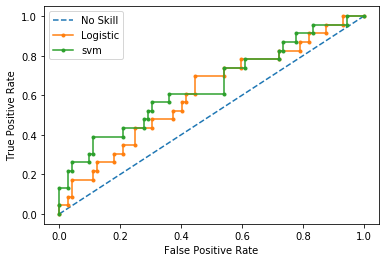

In [166]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probssvm = svmgridsearchf1.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probssvm = lr_probssvm[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, lr_probssvm)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('svm: ROC AUC=%.3f' % (svm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.613
svm: ROC AUC=0.630


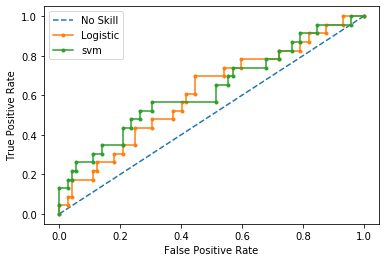

In [131]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probssvm = svmgridsearchf1.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probssvm = lr_probssvm[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, lr_probssvm)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('svm: ROC AUC=%.3f' % (svm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.613
RF: ROC AUC=0.480
RUS: ROC AUC=0.533
svm: ROC AUC=0.647


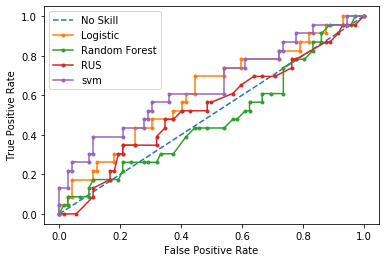

In [182]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrf = grid_searchrfx.predict_proba(X_test)
lr_probsrus = grid_searchrus.predict_proba(X_test)
lr_probssvm = svmgridsearchf1.predict_proba(X_test)


# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrf = lr_probsrf[:, 1]
lr_probsrus = lr_probsrus[:, 1]
lr_probssvm = lr_probssvm[:, 1]


# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, lr_probsrf)
rus_auc = roc_auc_score(y_test, lr_probsrus)
svm_auc = roc_auc_score(y_test, lr_probssvm)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RF: ROC AUC=%.3f' % (rf_auc))
print('RUS: ROC AUC=%.3f' % (rus_auc))
print('svm: ROC AUC=%.3f' % (svm_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
rus_fpr, rus_tpr, _ = roc_curve(y_test, lr_probsrus)
svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(rus_fpr, rus_tpr, marker='.', label='RUS')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# GRADIENT BOOST


In [143]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import GradientBoostingClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('gb', GradientBoostingClassifier(random_state=42,subsample=0.8))
    ])

param_grid = {
        'gb__learning_rate': [0.1,0.01,1,10],
        'gb__n_estimators': [10,20,25,30,45, 50],
        'gb__min_samples_split': [0.003,0.0025,0.0035,0.001],
        'gb__min_samples_leaf': [0.003,0.0025,0.0035,0.001],
        'gb__max_depth': [5,6,7,8,10],
        
        
}

# Create a based model

# Instantiate the grid search model
grid_searchgb = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)

In [144]:
param_grid = {
        'gb__learning_rate': [0.1,0.01,1],
        'gb__n_estimators': [10,20,25,30,45, 50],
        'gb__min_samples_split': [0.003,0.0025,0.0035,0.001],
        'gb__min_samples_leaf': [0.003,0.0025,0.0035,0.001],
        'gb__max_depth': [5,6,7,8,10]
}

In [145]:
grid_searchgb.fit(X_train, y_train)
grid_searchgb.best_params_

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 1449 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 2241 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 3177 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 4257 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 5481 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 6849 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 8361 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 9577 out of 9600 | elapsed:  1.2min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  1.2min finished


{'gb__learning_rate': 10,
 'gb__max_depth': 10,
 'gb__min_samples_leaf': 0.003,
 'gb__min_samples_split': 0.003,
 'gb__n_estimators': 20}

In [146]:
grid_searchgb.best_score_

0.3547201991907874

In [147]:
grid_searchgb.score(X_test,y_test)

0.24

In [148]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchgb.predict(X_test)
CM = confusion_matrix(y_test, rfsmotey)
print(CM)

[[51 21]
 [17  6]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.613
gb: ROC AUC=0.522


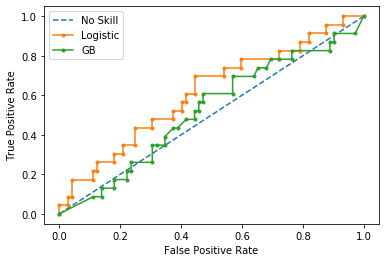

In [149]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsgb = grid_searchgb.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsgb = lr_probsgb[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
gb_auc = roc_auc_score(y_test, lr_probsgb)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('gb: ROC AUC=%.3f' % (gb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

gb_fpr, gb_tpr, _ = roc_curve(y_test, lr_probsgb)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='GB')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.613
RF: ROC AUC=0.480
ada: ROC AUC=0.533
svm: ROC AUC=0.647
gb: ROC AUC=0.522


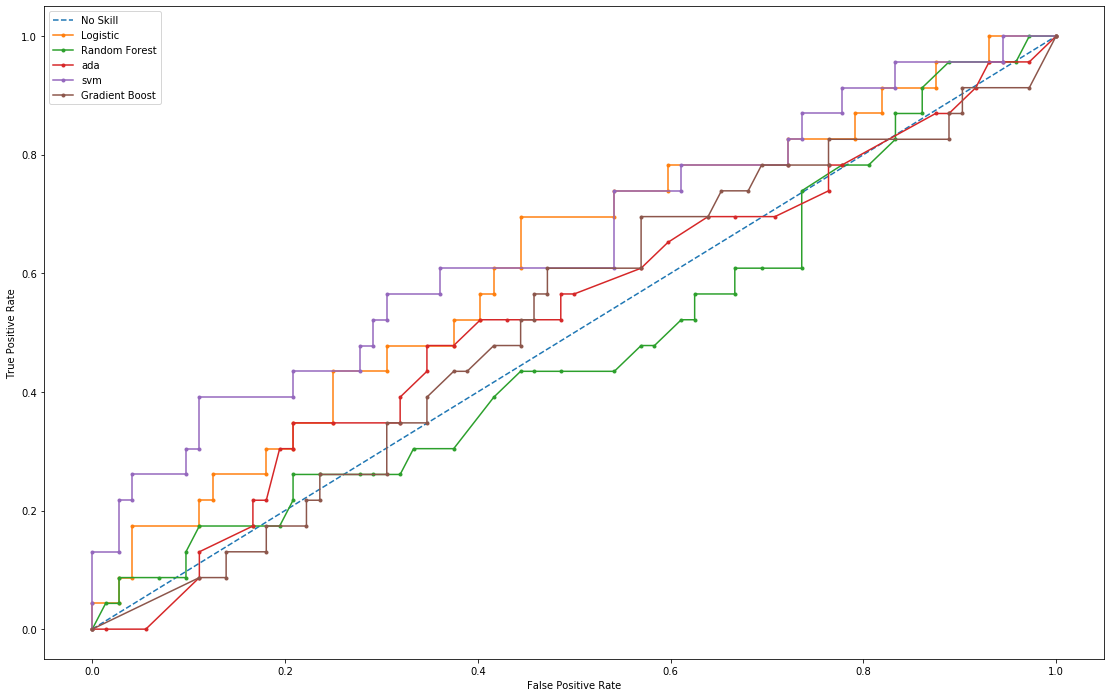

In [183]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fig= pyplot.figure(figsize=(19,12))
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrf = grid_searchrfx.predict_proba(X_test)
lr_probsrus = grid_searchrus.predict_proba(X_test)
lr_probssvm = svmgridsearchf1.predict_proba(X_test)
lr_probsgb = grid_searchgb.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrf = lr_probsrf[:, 1]
lr_probsrus = lr_probsrus[:, 1]
lr_probssvm = lr_probssvm[:, 1]
lr_probsgb = lr_probsgb[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, lr_probsrf)
rus_auc = roc_auc_score(y_test, lr_probsrus)
svm_auc = roc_auc_score(y_test, lr_probssvm)
gb_auc = roc_auc_score(y_test, lr_probsgb)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RF: ROC AUC=%.3f' % (rf_auc))
print('ada: ROC AUC=%.3f' % (rus_auc))
print('svm: ROC AUC=%.3f' % (svm_auc))
print('gb: ROC AUC=%.3f' % (gb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
rus_fpr, rus_tpr, _ = roc_curve(y_test, lr_probsrus)
svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)
gb_fpr, gb_tpr, _ = roc_curve(y_test, lr_probsgb)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
pyplot.plot(rus_fpr, rus_tpr, marker='.', label='ada')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boost')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fig= pyplot.figure(figsize=(19,12))
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
# lr_probsrf = grid_searchrfx.predict_proba(X_test)
# lr_probsrus = grid_searchrus1.predict_proba(X_test)
lr_probssvm = svmgridsearchf1.predict_proba(X_test)
lr_probsgb = grid_searchgb.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# lr_probsrf = lr_probsrf[:, 1]
# lr_probsrus = lr_probsrus[:, 1]
lr_probssvm = lr_probssvm[:, 1]
lr_probsgb = lr_probsgb[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# rf_auc = roc_auc_score(y_test, lr_probsrf)
# rus_auc = roc_auc_score(y_test, lr_probsrus)
svm_auc = roc_auc_score(y_test, lr_probssvm)
gb_auc = roc_auc_score(y_test, lr_probsgb)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# print('RF: ROC AUC=%.3f' % (rf_auc))
# print('RUS: ROC AUC=%.3f' % (rus_auc))
print('svm: ROC AUC=%.3f' % (svm_auc))
print('gb: ROC AUC=%.3f' % (gb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
# rus_fpr, rus_tpr, _ = roc_curve(y_test, lr_probsrus)
svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)
gb_fpr, gb_tpr, _ = roc_curve(y_test, lr_probsgb)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# pyplot.plot(rus_fpr, rus_tpr, marker='.', label='RUS')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boost')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve

def get_best_threshold(testy,yhat):
    fpr, tpr, thresholds = roc_curve(testy, yhat)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    return best_thresh



rfrr= grid_searchgb.predict_proba(X_test)
rfrr_thres=get_best_threshold(y_test,rfrr[:,1])
rfrr=(rfrr[:,1]>=rfrr_thres).astype(int)
rfrr_cm = confusion_matrix(y_test,rfrr)
print(rfrr_cm)

# Unbalanced  random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrfx = Pipeline([
        ('rf', RandomForestClassifier(random_state=42,class_weight = {0:1,1:3.5}))
    ])

param_gridx = {
    'rf__max_features': [0.15, 0.25,0.8,'sqrt','auto'],
        'rf__n_estimators': [10,25,45, 60,110, 148, 200],
        'rf__min_samples_split': [2, 3, 5, 8, 12],
         'rf__min_samples_leaf': [1, 2, 4,8,12,20],
        'rf__bootstrap': [True, False],
        'rf__max_depth': [5,10, 20,40, None ]

}

# Create a based model

# Instantiate the grid search model
grid_searchrfx = GridSearchCV(estimator = modelrfx, param_grid = param_gridx,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)
grid_searchrfx.fit(X_train, y_train)
grid_searchrfx.best_params_

In [45]:
print(grid_searchrfx.best_score_)
from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchrfx.predict(X_test)


CM = confusion_matrix(y_test, rfsmotey)
print(CM)


0.5045977011494253
[[53 19]
 [15  8]]


In [46]:
# import seaborn as sn
# import pandas as pd
# import matplotlib.pyplot as plt

# plt.figure(figsize = (10,7))
# sn.heatmap(CM, annot=True, annot_kws={"size": 20},fmt="d")
grid_searchrfx.score(X_test,y_test)

0.31999999999999995

In [47]:
rfsmotey = grid_searchrfx.predict(X_test)


CM = confusion_matrix(y_test, rfsmotey)
print(CM)
print(CM)

[[53 19]
 [15  8]]
[[53 19]
 [15  8]]


In [48]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve

def get_best_threshold(testy,yhat):
    fpr, tpr, thresholds = roc_curve(testy, yhat)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    return best_thresh



rfrr= grid_searchrfx.predict_proba(X_test)
rfrr_thres=get_best_threshold(y_test,rfrr[:,1])
rfrr=(rfrr[:,1]>=rfrr_thres).astype(int)
rfrr_cm = confusion_matrix(y_test,rfrr)
print(rfrr_cm)

Best Threshold=0.402123
[[28 44]
 [ 6 17]]


In [49]:
X_train.shape

(285, 31)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.614
RF: ROC AUC=0.543


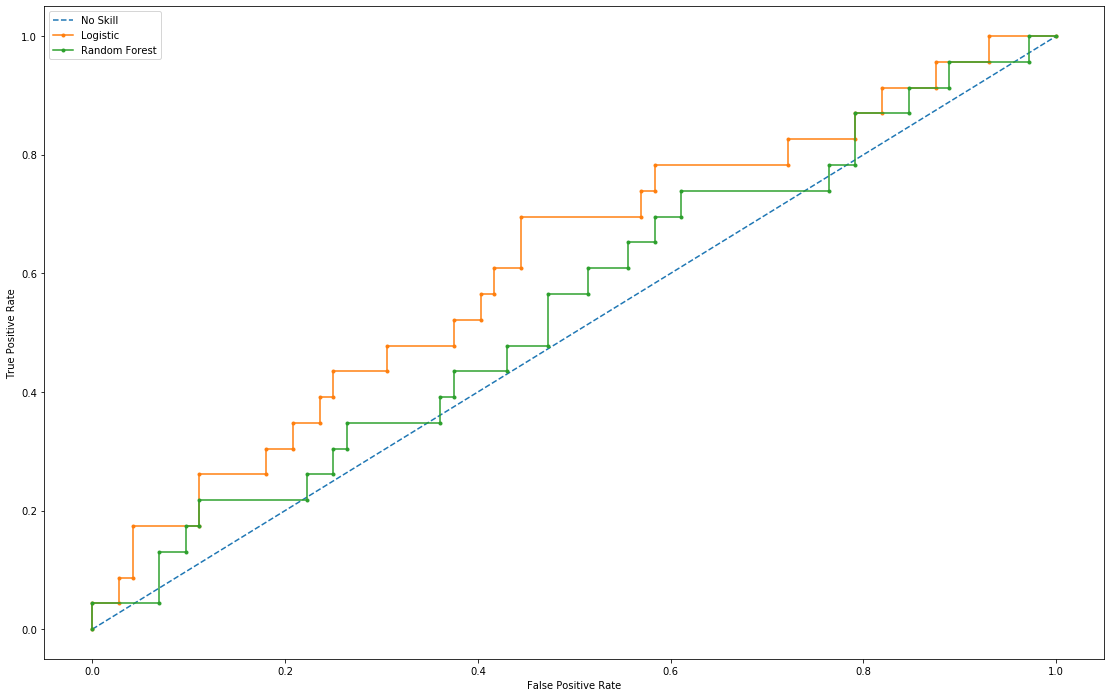

In [50]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fig= pyplot.figure(figsize=(19,12))
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrf = grid_searchrfx.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrf = lr_probsrf[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, lr_probsrf)
# svm_auc = roc_auc_score(y_test, lr_probssvm)
# gb_auc = roc_auc_score(y_test, lr_probsgb)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RF: ROC AUC=%.3f' % (rf_auc))
# print('svm: ROC AUC=%.3f' % (svm_auc))
# print('gb: ROC AUC=%.3f' % (gb_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
# svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)
# gb_fpr, gb_tpr, _ = roc_curve(y_test, lr_probsgb)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')
# pyplot.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boost')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()